In [2]:
# show istograms, cake diagram and correlation
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_rows = 1000

data = pd.read_csv(r'card_transdata_preprocessed.csv')
# data.head() # show only first rows
display(data)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [ ]:
# describe dataset: we drop binary attributes before describe function
# beacause no sense make mean, std, min.... with 0/1 attributes () -> original data doesn't change number of attributes
data.drop(['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], axis=1).describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


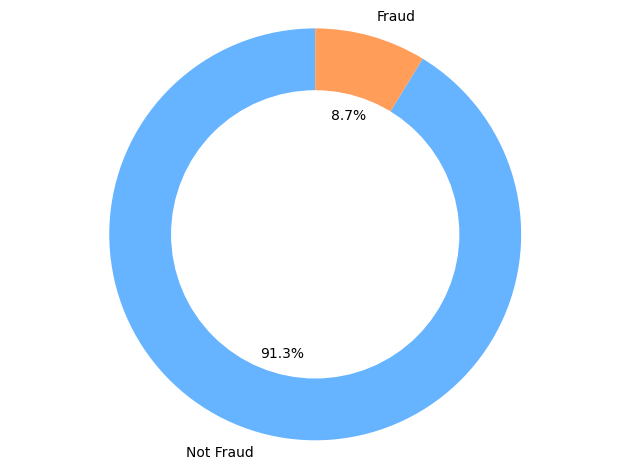

In [31]:
# fraud
"""
print(data['fraud'].value_counts()) # -> 90% are genuine transactions, 10% are fraud
labels = ['Not fraud', 'Fraud'] # 1 fraud, 0 not fraud
size = data['fraud'].value_counts()
colors = ['orange', 'lightgreen']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Fraud', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

"""



# Pie chart
labels = ['Not Fraud', 'Fraud']

#colors
colors = ['#66b3ff','#ff9d59']

# size
size = data['fraud'].value_counts()

#plot 
fig1, ax1 = plt.subplots()
ax1.pie(size, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

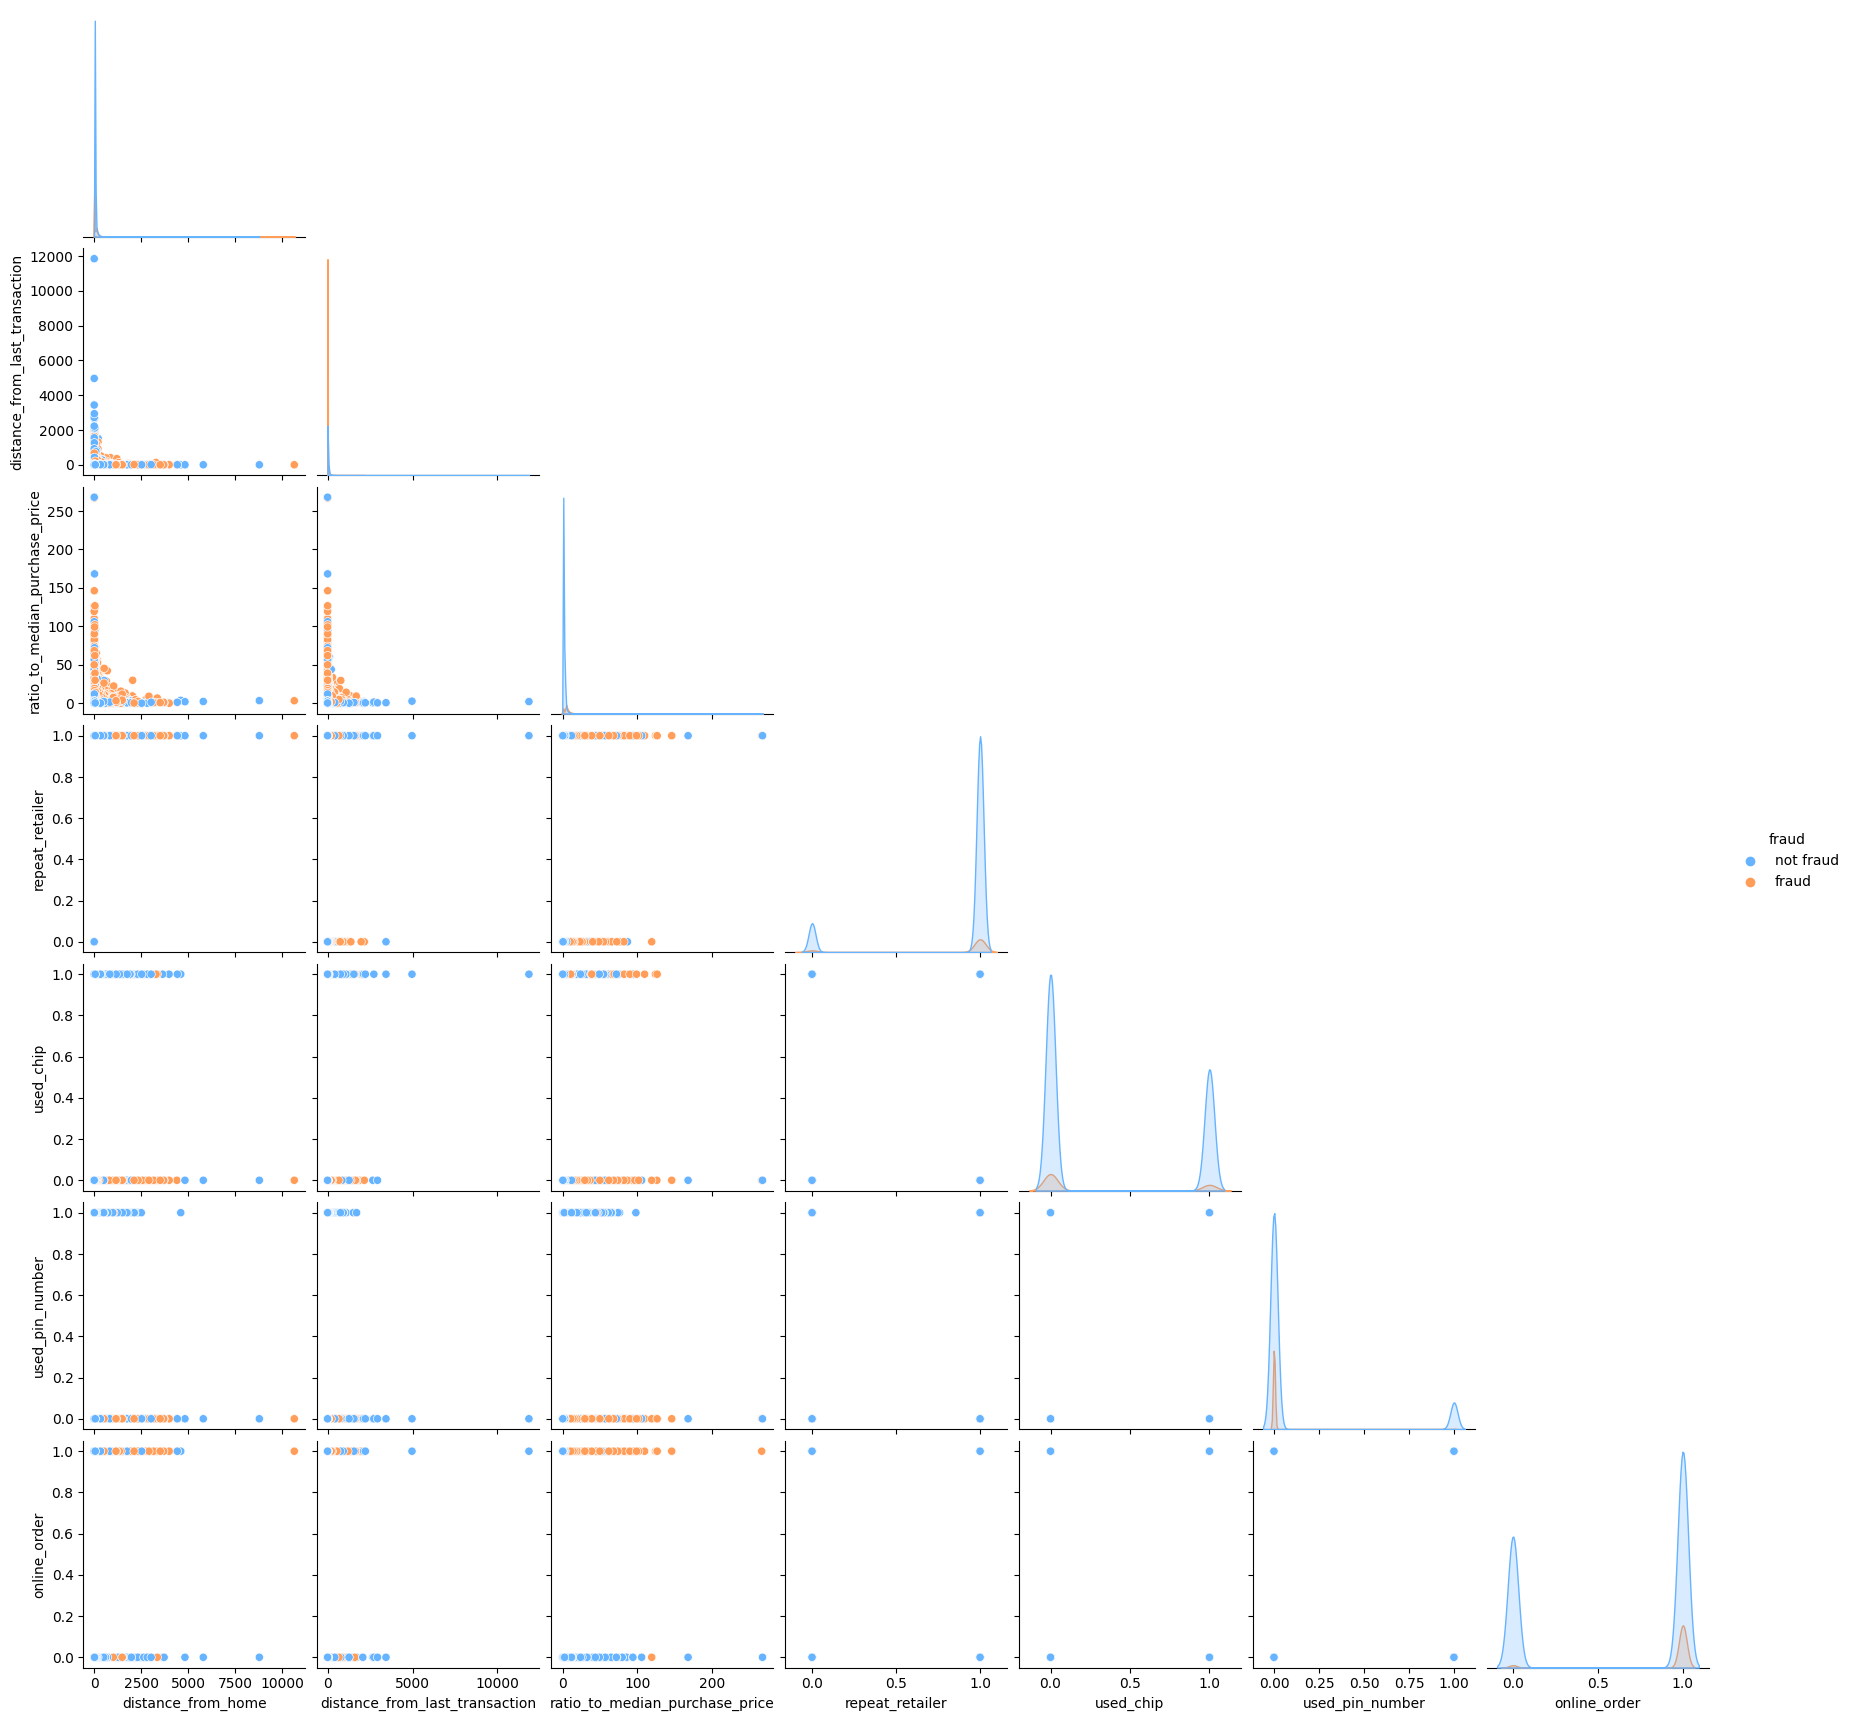

In [32]:
# PUT IT IN RELATION LATEX
labeled_data = data
labeled_data["fraud"].replace({0:"not fraud", 1:"fraud"}, inplace=True)

# sns.pairplot(labeled_data, hue="fraud", corner=True, palette=['#66b3ff','#ff9d59'])
sns.pairplot(labeled_data, hue="fraud", corner=True, palette=['#66b3ff','#ff9d59']) 

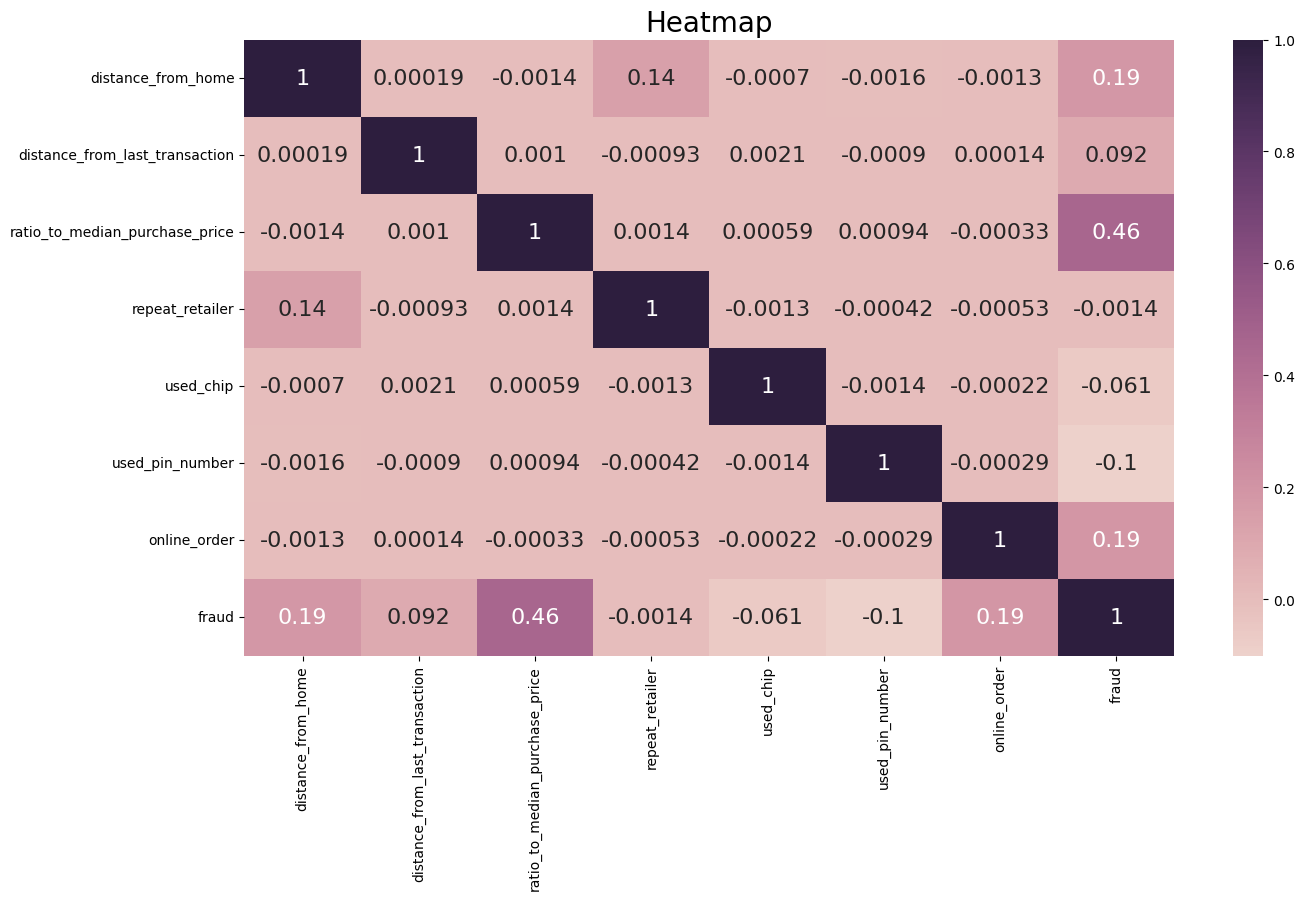

'plt.figure(figsize=(15,8))\nsns.heatmap(data.drop(["repeat_retailer", "fraud", "used_chip", "used_pin_number", "online_order"], axis=1).corr(), cmap="Blues", annot=True, annot_kws={"fontsize":16})\nplt.title("Heatmap", fontsize=20)\nplt.show() '

In [27]:
# PUT IN RELATION LATEX THE FIRST ONE
# color map / correlation
# if two variable are correlated don't put both in algorithm because one derive from the other
# -> there is no particular correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, annot_kws={"fontsize":16})
plt.title("Heatmap", fontsize=20)
plt.show()
"""plt.figure(figsize=(15,8))
sns.heatmap(data.drop(["repeat_retailer", "fraud", "used_chip", "used_pin_number", "online_order"], axis=1).corr(), cmap="Blues", annot=True, annot_kws={"fontsize":16})
plt.title("Heatmap", fontsize=20)
plt.show() """
